In [ ]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
from adjustText import adjust_text

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# My Attempt

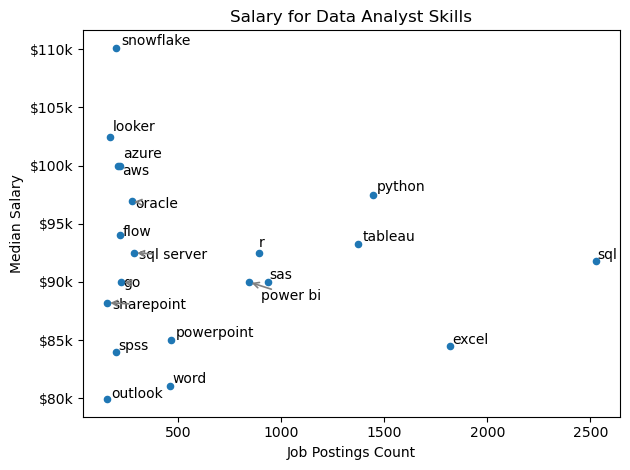

In [7]:
my_df = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(['United States','Canada']))].copy()
my_df = my_df.dropna(subset='salary_year_avg')
my_df_exploded = my_df.explode('job_skills')
skill_stats = my_df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_number = 20
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(skill_number)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Job Postings Count')
plt.ylabel('Median Salary')
plt.title('Salary for Data Analyst Skills')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

adjust_text(
    texts,
    ax=ax,
    expand_text=(1.1, 1.2),
    expand_points=(1.2, 1.4),
    arrowprops=dict(arrowstyle='->', color='gray', lw=1.2, shrinkA=15),
    only_move={'points': 'y', 'text': 'y'},  # move only vertically for cleaner alignment
)
plt.tight_layout()
plt.show()

# Tutorial (Color Coding)

In [21]:
my_df_skills = my_df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
my_df_skills = my_df_skills.rename(columns={'count':'skill_count','median':'median_salary'})
job_count = len(my_df)
my_df_skills['skill_percent']=my_df_skills['skill_count']/job_count*100
skill_percent = 5
my_df_high_demand = my_df_skills[my_df_skills['skill_percent']>skill_percent]
my_df_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2525,91800.000,57.635243
excel,1817,84479.000,41.474549
python,1445,97500.000,32.983337
tableau,1374,93263.500,31.362703
sas,934,90000.000,21.319333
r,894,92500.000,20.406300
power bi,843,90000.000,19.242182
powerpoint,463,85000.000,10.568363
word,462,81097.375,10.545538


#### Making Type Dictionary (Completely from Tutorial)

In [36]:
df_tech = df['job_type_skills'].copy()
df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()
tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

df_tech = pd.DataFrame(list(tech_dict.items()),columns=['technology','skills'])
df_tech = df_tech.explode('skills')
my_df_plot = my_df_high_demand.merge(df_tech, left_on='job_skills', right_on='skills')

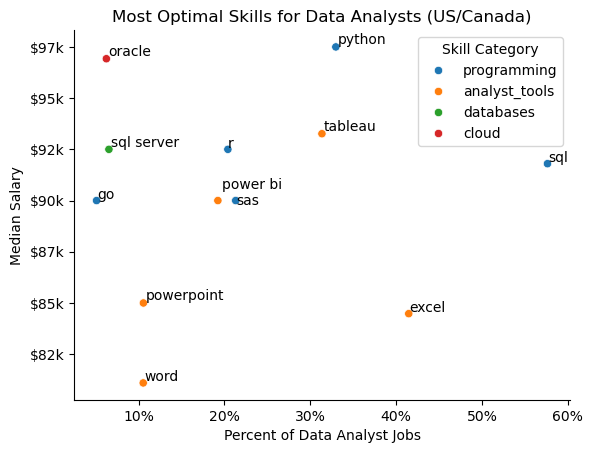

In [46]:
#my_df_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')
sns.scatterplot(data=my_df_plot,x='skill_percent',y='median_salary',hue='technology')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary')
plt.title('Most Optimal Skills for Data Analysts (US/Canada)')
plt.legend(title='Skill Category')
texts = []
for i, txt in enumerate(my_df_high_demand.index):
    texts.append(plt.text(my_df_high_demand['skill_percent'].iloc[i],my_df_high_demand['median_salary'].iloc[i],txt))
adjust_text(texts)
sns.despine()
plt.show()